In [144]:
from mpl_toolkits.mplot3d import Axes3D

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing

In [147]:
from scipy.stats import skew
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlxtend.evaluate import bias_variance_decomp

In [148]:
import seaborn as sns


In [149]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [150]:
df=pd.read_csv("Life Expectancy Data.csv", delimiter=",")

In [151]:
df.head(5)

,Country,Year,Status,Life_expectancy,Adult_ Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis:B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness _1-19yrs,thinness_5-9yrs,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [152]:
df.shape

(2938, 22)

In [153]:
df.dataframeName = 'Life Expectancy Data.csv'

C:\Users\vtknn\AppData\Local\Temp\ipykernel_25080\2970181590.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\vtknn\AppData\Local\Temp\ipykernel_25080\2970181590.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


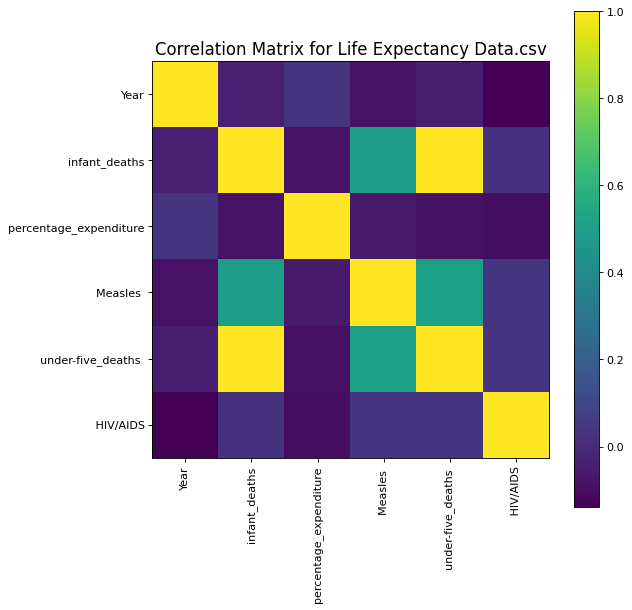

In [154]:
plotCorrelationMatrix(df, 8)

In [155]:
# Check for null values for each attribute

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_ Mortality                    10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis:B                        553
Measles                              0
 BMI                                34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness _1-19yrs                  34
 thinness_5-9yrs                    34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [156]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy ', 'Adult_ Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis:B',
       'Measles ', ' BMI ', 'under-five_deaths ', 'Polio', 'Total_expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness _1-19yrs',
       ' thinness_5-9yrs', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [157]:
df["Life_expectancy "]

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_expectancy , Length: 2938, dtype: float64

In [158]:
# Drop NaN values

df.dropna(subset=['Life_expectancy '], inplace=True)

In [159]:
#df2 statistics summary 

df.describe(include='all')

,Country,Year,Status,Life_expectancy,Adult_ Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis:B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness _1-19yrs,thinness_5-9yrs,Income_composition_of_resources,Schooling
count,2928,2928.00000,2928,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,...,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
unique,183,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.50000,NaN,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,...,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,NaN,4.61056,NaN,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,...,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,NaN,2000.00000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2003.75000,NaN,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,...,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,NaN,2007.50000,NaN,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,...,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,NaN,2011.25000,NaN,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,...,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000


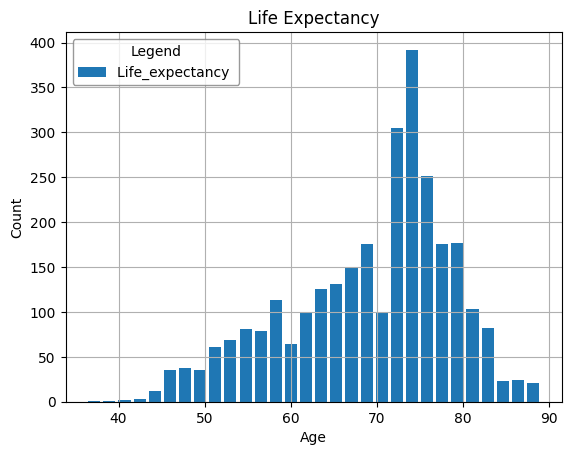

In [160]:
df["Life_expectancy "].plot.hist(grid=True, bins=30, rwidth=0.8) 
plt.title('Life Expectancy') 
plt.ylabel('Count') 
plt.xlabel('Age')
plt.legend(facecolor='white', edgecolor='grey',
           loc='best', title='Legend', frameon=True, fontsize='medium')

In [161]:
# Measure the skewness our target variable
skewness = skew(df["Life_expectancy "])

print('The skewness of our target variable is:', skewness)

The skewness of our target variable is: -0.638277535245317


In [162]:
# LabelEncoder() is used to transform categorical values to numerical

label_encode = LabelEncoder()

# fit_transform fits and transform the categorical values of 'Status' & 'Country' to numerical in 1 step

labels_status = label_encode.fit_transform(df['Status'])
labels_country = label_encode.fit_transform(df['Country'])

In [163]:
# We assign the new label encoded values to their original feature names

df['Status'] = labels_status
df['Country'] = labels_country

In [164]:
df.sample(10)

,Country,Year,Status,Life_expectancy,Adult_ Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis:B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness _1-19yrs,thinness_5-9yrs,Income_composition_of_resources,Schooling
1829,114,2015,0,81.9,57.0,1,NaN,0.000000,94.0,7,...,95.0,NaN,95.0,0.1,44292.884730,16939923.0,1.0,0.9,0.923,18.1
1186,74,2015,1,68.3,181.0,910,NaN,0.000000,87.0,90387,...,86.0,NaN,87.0,0.2,1613.188780,1395398.0,26.7,27.3,0.615,11.6
32,2,2015,1,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
1174,73,2011,0,82.1,51.0,0,8.13,7.048093,NaN,0,...,95.0,8.65,95.0,0.1,46.217000,31914.0,0.9,0.9,0.894,18.6
164,10,2011,1,75.0,162.0,0,9.34,0.000000,95.0,0,...,97.0,7.63,98.0,0.1,NaN,NaN,2.5,2.5,0.788,12.6
1923,119,2002,0,78.9,81.0,0,5.89,749.682338,NaN,5,...,93.0,9.62,93.0,0.1,4361.153800,4538159.0,0.8,0.7,0.916,17.1
1739,108,2008,1,74.6,121.0,0,6.17,709.131123,93.0,0,...,95.0,6.13,95.0,0.1,7325.734740,616969.0,2.1,2.1,0.774,14.2
1311,81,2002,1,73.0,167.0,1,3.76,211.114332,NaN,0,...,99.0,4.86,99.0,2.3,3596.496282,2695446.0,2.0,1.8,0.690,11.7
1746,108,2001,1,73.3,136.0,0,0.01,33.669814,NaN,0,...,NaN,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1440,89,2001,1,58.7,271.0,13,3.13,0.000000,NaN,94,...,55.0,4.32,52.0,0.1,NaN,NaN,1.4,1.5,0.463,8.0


In [165]:
# .drop() function to drop unwanted features



X = df.drop(columns = ['Total_expenditure','Alcohol' ,'Life_expectancy ' ,'percentage_expenditure', 'Country' ,'Population' ,'Measles ' ], axis = 1)
Y = df['Life_expectancy '].values

In [166]:
X.shape

(2928, 15)

In [167]:
Y.shape

(2928,)

In [168]:
df.shape

(2928, 22)

In [169]:
X.mean()

Year                               2007.500000
Status                                0.825137
Adult_ Mortality                    164.796448
infant_deaths                        30.407445
Hepatitis:B                          80.960842
 BMI                                 38.235394
under-five_deaths                    42.179303
Polio                                82.548298
Diphtheria                           82.321416
 HIV/AIDS                             1.747712
GDP                                7494.210719
 thinness _1-19yrs                    4.850622
 thinness_5-9yrs                      4.881423
Income_composition_of_resources       0.627419
Schooling                            11.999639
dtype: float64

In [170]:
Y.mean()

69.22493169398908

In [171]:
X.std()

Year                                   4.610560
Status                                 0.379915
Adult_ Mortality                     124.292079
infant_deaths                        118.114450
Hepatitis:B                           25.018337
 BMI                                  19.959590
under-five_deaths                    160.700547
Polio                                 23.416674
Diphtheria                            23.706644
 HIV/AIDS                              5.085542
GDP                                14282.251492
 thinness _1-19yrs                     4.420829
 thinness_5-9yrs                       4.509609
Income_composition_of_resources        0.210978
Schooling                              3.346440
dtype: float64

In [172]:
Y.std()

9.522241005447514

In [173]:
# We filled the NaN values using the mean() function

mean = X.mean()
X.fillna(mean, inplace=True)
print(X.isna().sum())

Year                               0
Status                             0
Adult_ Mortality                   0
infant_deaths                      0
Hepatitis:B                        0
 BMI                               0
under-five_deaths                  0
Polio                              0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness _1-19yrs                 0
 thinness_5-9yrs                   0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


In [174]:
# standardize and transform X using the StandardScaler().fit_transform function

standardized_data = StandardScaler().fit_transform(X)
X = standardized_data

In [175]:
# Split data into training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [176]:
svr = SVR()

In [177]:
svr.fit(X_train,Y_train)

SVR()

In [178]:
Y_pred=svr.predict(X_train)

In [179]:
Y_pred

array([81.38562932, 59.5159957 , 70.29746379, ..., 62.24352935,
       77.35635306, 58.68086637])

In [180]:
Y_train

array([81.6, 61.6, 72.1, ..., 65. , 79.8, 58.8])

In [181]:
Train_acc=svr.score(X_train,Y_train)
print("Training Accuracy:",Train_acc)

Training Accuracy: 0.8722725409067504


In [182]:
Y_testpred=svr.predict(X_test)

In [183]:
Y_testpred

array([54.67078144, 70.72924034, 81.81301502, 75.80651016, 57.36466542,
       65.16955052, 72.77939767, 78.25177222, 77.17684369, 70.47745009,
       73.05076238, 78.68508247, 53.68493497, 49.7099205 , 72.20725729,
       75.00693281, 77.14919218, 78.87381858, 77.49696703, 72.10876765,
       65.94992876, 82.37253758, 54.28239385, 62.66784794, 69.2221069 ,
       52.15462347, 56.6601816 , 74.95395144, 66.57966333, 81.59305718,
       72.10002697, 73.63845247, 60.83151151, 70.76142292, 73.45706144,
       54.28013294, 74.77071253, 70.62382039, 76.93768618, 73.30902327,
       56.4077601 , 69.88688175, 77.94701222, 60.89634249, 57.10694511,
       71.62078597, 77.11891139, 69.17620619, 68.9261998 , 61.72027884,
       72.2283814 , 74.89770516, 67.48963679, 58.62453728, 69.15552601,
       72.95734494, 71.19942891, 72.33484388, 74.53557759, 58.64010428,
       70.09420011, 67.96567982, 60.32491667, 56.31331868, 54.29824439,
       80.09331246, 64.75747942, 60.98290256, 75.61129676, 73.26

In [184]:
Y_test

array([56.5, 73. , 82.5, 75.6, 53. , 65.2, 72.4, 74.1, 77. , 67.8, 73.1,
       75.1, 44.3, 47.9, 74.3, 74.6, 78.4, 77.7, 79.1, 73.3, 62.8, 82.5,
       54. , 63.4, 72. , 47.8, 52.1, 75.1, 65.6, 78.4, 73.9, 76.3, 61.2,
       69.6, 72.7, 57.9, 74.5, 69.4, 77. , 75.4, 57.7, 67.3, 78.5, 54.2,
       47.6, 68.9, 79.4, 67.6, 63.3, 59.8, 71.7, 73.2, 66.5, 58.6, 67.7,
       72.8, 69.2, 72.8, 76.4, 53.3, 72.5, 69. , 59.4, 56. , 54.1, 81.9,
       64.5, 55.3, 73. , 72.4, 75.5, 85. , 74.1, 75.6, 53.2, 75.2, 74.9,
       74.7, 73.3, 77.3, 75.9, 83. , 71.3, 63.8, 76.8, 65.9, 74.1, 79.1,
       77.8, 77.5, 62.2, 79.5, 81.1, 77.7, 65.3, 51.9, 74.7, 67.3, 66.2,
       84. , 69.6, 51.2, 74.6, 76.9, 58. , 75.6, 57.4, 75.7, 63.3, 67.3,
       82.1, 71. , 81.8, 62.9, 75.3, 83. , 82.7, 72.9, 59.8, 75.2, 73. ,
       76. , 72.2, 71.1, 74.3, 70. , 69.5, 74.4, 69.9, 75.6, 73.6, 67.9,
       54. , 81.5, 86. , 74. , 79. , 64.4, 79. , 82.5, 72.8, 71.6, 64. ,
       81.5, 74.6, 56.5, 78.7, 55.3, 81.6, 67.1, 52

In [185]:
Test_acc=svr.score(X_test,Y_test)
print("Testing Accuracy:",Test_acc)

Testing Accuracy: 0.8667044589072187


In [186]:
# Evaluate the model's performance metrics using MSE, MAE 

MSE = mean_squared_error(Y_test, Y_testpred) 
MAE = mean_absolute_error(Y_test, Y_testpred)

print("Mean Squared Error:", MSE)
print("Mean Absolute Error:", MAE)

Mean Squared Error: 12.448531756299419
Mean Absolute Error: 2.4098987617824443


In [187]:
# Estimating the Bias and Variance using bias_variance_decomp() from mlxtend.evaluate library

mse, bias, var = bias_variance_decomp(svr, X_train, Y_train, X_test, Y_test, loss='mse')

# summarize results
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

Bias: 12.535
Variance: 0.321
